# Lista 4 - ICs e Bootstrap

## Intervalos de Confiança

Intervalos de confiança são intervalos calculados a partir de observações que podem variar de amostra para amostra e que com dada frequência (nível de confiança) inclui o parâmetro de interesse real não observável. 

**Por exemplo:** Um intervalo com nível de confiança de 99% para a média de uma variável aleatória significa que ao calcularmos *n* intervalos de confiança tomando como base *n* amostras aleatórias, espera-se que 99% dos intervalos construídos contenham o valor real do parâmetro (média).

Em outras palavras, o nível de confiança seria a proporção de intervalos de confiança construídos em experimentos separados da mesma população e com o mesmo procedimento que contém o parâmetro de interesse real.

Foram ministradas duas maneiras de construírmos intervalos de confiança:

- Probabilisticamente direto dos dados (Forma clássica).
- Via sub-amostragem com reposição (*Bootstrap*).

Para o primeiro caso, lembrando do conceito visto em aula, temos (para um IC com 95% de confiança):

$$\begin{align}
0.95 = P(-z \le Z \le z)=P \left(-1.96 \le \frac {\bar X-\mu}{\sigma/\sqrt{n}} \le 1.96 \right) = P \left( \bar X - 1.96 \frac \sigma {\sqrt{n}} \le \mu \le \bar X + 1.96 \frac \sigma {\sqrt{n}}\right).
\end{align}$$

Vamos colocar na prática!

## Exemplo Inicial

Vamos começar construindo um intervalo de confiança pra a média de uma distribuição Normal (Gaussiana) com média $\mu = 0$ e variância $\sigma² = 1$.

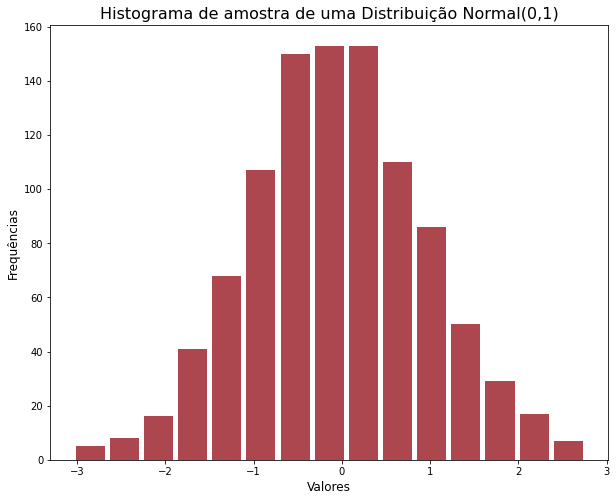

INTERVALO DE CONFIANCA (manual) = [-0.1065, 0.0160]
INTERVALO DE CONFIANCA (com scipy)= [-0.1065, 0.0160]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
plt.rcParams["figure.figsize"] = (10,8)

np.random.seed(0) # comando adicionado para reprodutibilidade dos números aleatórios gerados

def confidence_interval(loc, scale, alpha=0.99):
  """Essa função cria uma distribuição Normal com base nos parâmetros fornecidos e constrói um intervalo de confiança para sua média.
  
  Parameters:
  -----------
  loc (float): Média da distribuição desejada.
  scale (float): Desvio padrão da distribuição desejada.
  alpha (float): Nível de confiança do intervalo. Deve ser um valor entre 0 e 1. Default = 0.99, o que corresponde a 99% de confiança.

  Returns:
  -----------
  X (array): Dados gerados segundo uma distribuição Normal(0,1).
  LI (float): Limite inferior do intervalo calculado.
  LS (float): Limite superior do intervalo calculado.

  """
  
  # Gerando amostra de uma Normal(0,1) de tamanho N
  N = 1000
  X = np.random.normal(loc=loc, scale=scale, size=N)

  # Criando plot da amostra gerada
  plt.xlabel('Valores', fontsize=12)
  plt.ylabel('Frequências', fontsize=12)
  plt.title('Histograma de amostra de uma Distribuição Normal(0,1)', fontsize=16)

  plt.hist(X, color='#A3333D', alpha=0.9, rwidth=0.85, bins=15)
  plt.show()

  # Calculando intervalo de  95% de confiança para a média manualmente
  LI = X.mean() - 1.96 * (X.std(ddof=1) / np.sqrt(N)) # LI = limite inferior
  LS = X.mean() + 1.96 * (X.std(ddof=1) / np.sqrt(N)) # LS = limite superior
  print("INTERVALO DE CONFIANCA (manual) = [{:.4f}, {:.4f}]".format(LI, LS))

  # Utilizando o valor da confiança como base, utilizamos o pacote scipy.stats
  LI = X.mean() - ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (X.std(ddof=1) / np.sqrt(N))
  LS = X.mean() + ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (X.std(ddof=1) / np.sqrt(N))

  # Printando intervalo de confiança
  print("INTERVALO DE CONFIANCA (com scipy)= [{:.4f}, {:.4f}]".format(LI, LS))

  return X, LI, LS

X, LI, LS = confidence_interval(loc=0, scale=1, alpha=0.95)

Podemos afirmar que, se pudermos repetir muitas vezes o experimento e coletarmos os dados, aproximadamente em 95% das vezes a média populacional estará no intervalo encontrado.

**Algumas observações interessantes. Note que:**
- A cada vez que executamos o código acima, tanto os intervalos como o histograma dos dados são diferentes. Estamos realizando uma amostra de uma distribuição.
- A medida que o tamanho da amostra (N) cresce, o tamanho do intervalo - para um mesmo nível de confiança - cai. Isso ocorre pois com mais dados temos uma maior certeza de que os valores encontrados de fato representam a população de interesse.
- Os valores dos intervalos de confiança (manual e scipy) só coincidem quando *alpha=0.95*. Essa é a vantagem de se utilizar o pacote. Para valores diferentes de 0.95, deve-se consultar o valor correspondente na distribuição Z.

## Dados ENEM 2015.

Nos exercícios dessa seção vamos trabalhar com os dados do [ENEM 2015](https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/enem2015.csv).

Importando pandas e carregando dados.

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/enem2015.csv'
data = pd.read_csv(url)

Primeiras visualizações do banco de dados do ENEM 2015.

In [4]:
data.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


In [5]:
data.describe()

,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
count,1685.000000,1683.000000,1685.000000
mean,575.391745,86.044444,75.263669
std,40.796223,10.334011,16.886193
min,487.007141,47.700000,50.000000
25%,544.937500,79.500000,59.615387
50%,561.520752,87.800000,72.916672
75%,607.530579,94.550000,92.857140
max,713.629028,100.000000,100.000000


## Exercício 01

Altere a função a baixo para retornar o intervalo de confiança para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas com 'DEPENDENCIA_ADMINISTRATIVA' == Estadual.

Nível de confiança: 99%

**Lembrete**: será necessário aplicar os conhecimentos de pandas do módulo anterior para filtrar o DataFrame selecionando apenas os casos de interesse.

In [6]:
data.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


In [13]:
def CI(array):
  # Retorne uma tupla com os limites inferior e superior do intervalo de confiança, respectivamente
  # return (LI, LS)
  # se ocorrer erro de float, tente dar cast na tupla (LI,LS) assim: (np.array(LI), np.array(LS))
  df = array.query("DEPENDENCIA_ADMINISTRATIVA == 'Estadual'")
  arr = df["NOTA_MEDIA_ESCOLA"]

  x_bar = arr.mean()
  s = arr.std()
  n = len(arr)

  pct_inf = x_bar - 2.576*(s/(n**0.5))
  pct_sup = x_bar + 2.576*(s/(n**0.5))
  
  return pct_inf, pct_sup

Carregando os módulos de testes!

In [14]:
from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal

from numpy.testing import assert_array_almost_equal
from numpy.testing import assert_array_equal

Nosso teste

In [15]:
(LI, LS) = CI(data)

assert_equal(548.13, LI.round(2))
assert_equal(551.09, LS.round(2))

## Exercício 02 (Sem correção automática)

Plote uma CDF da coluna 'TAXA_DE_APROVACAO'.

**Use o statsmodels e crie um objeto `ecdf = ECDF(...)`.**


Esta tarefa não tem correção automática, use o gráfico abaixo para saber se acertou ou não.

![](https://github.com/pedroharaujo/ICD_Docencia/blob/master/ECDF.png?raw=true)

In [20]:
# codigo para importar a função ECDF
from statsmodels.distributions.empirical_distribution import ECDF

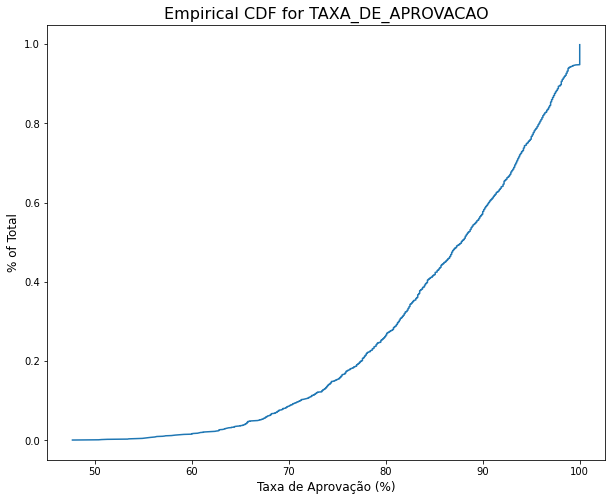

In [28]:
# YOUR CODE HERE
ecdf = ECDF(data["TAXA_DE_APROVACAO"])
x = ecdf.x
y = ecdf.y

plt.xlabel('Taxa de Aprovação (%)', fontsize=12)
plt.ylabel('% of Total', fontsize=12)
plt.title('Empirical CDF for TAXA_DE_APROVACAO', fontsize=16)
plt.plot(x, y)
plt.show()

## Bootstrap

Quando falamos em bootstrap deve-se ter em mente que estamos falando de amostragem com reposição.

De maneira simplista, utilizamos bootstrap quando queremos construir um intervalo de confiança para uma variável e dispomos de poucos dados. Ao realizarmos várias sub-amostras **com reposição**, a lei dos grandes números nos garante que estamos aproximando a população de interesse.

Note o destaque para o termo com reposição. É CRUCIAL que as sub-amostras sejam feitas com reposição. Só assim garantimos a aleatoriedade!

Veja o exemplo abaixo.

In [29]:
col = 'TAXA_DE_PARTICIPACAO'
n_sub = 10000 #numero de sub-amostras
size = len(data) #tamanho do dataframe
values = np.zeros(n_sub)

def bootstrap(n_sub, size, col):
  for i in range(n_sub):
    # replace=TRUE garanta amostras com reposição
    random_state=i #garante replicabilidade do experimento
    sample = data.sample(size, replace=True, random_state=i) 
    
    # Lembre que podemos utilizar mediana, média ou qualquer outra estatística agregada
    # values[i] = sample[col].median()
    values[i] = sample[col].mean()
  
  # Gerando valores inferior e superior para um nível de confiança de 95%
  LI = np.percentile(values, 2.5)
  LS = np.percentile(values, 97.5)
  return values, LI, LS

values, LI, LS = bootstrap(n_sub, size, col)
print('Intervalo de Confianca: [{}, {}]'.format(LI.round(4), LS.round(4)))

Intervalo de Confianca: [74.4523, 76.0718]


## Exercício 03

Realizando um groupy pela coluna 'DEPENDENCIA_ADMINISTRATIVA' conseguimos observar para quais casos vale a pena utilizarmos bootstrap.

In [30]:
data.groupby('DEPENDENCIA_ADMINISTRATIVA').count()

,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
DEPENDENCIA_ADMINISTRATIVA,,,
Estadual,1054,1054,1054
Federal,43,42,43
Municipal,22,22,22
Privada,566,565,566


**A)** Na função abaixo, retorne o número da opção que indica para quais 'DEPENDENCIAS_ADMINISTRATIVAS' é aconselhado utilizar Bootstrap para construção do intervalo de confiança:

- 1) Estadual e Federal.
- 2) Estadual e Municipal.
- 3) Estadual e Privada.
- 4) Federal e Municipal.
- 5) Federal e Privada.
- 6) Municipal e Privada.

In [31]:
def resposta():
  # Escolha uma das opções acima
  # return 1 ou 2 ou 3 ou 4 ou 5 ou 6
  # Escreva sua resposta abaixo:
  # YOUR CODE HERE
  return 4

In [32]:
assert_equal(4, resposta())

**B)** Construa um intervalo de confiança via Bootstrap para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas de 'DEPENDENCIA_ADMINISTRATIVA' **Federal**. Você deve utilizar 5000 amostras e nível de confiança de 90%.

*Nota*: você deve utilizar o argumento random_state=i na função data.sample, como no exemplo inicial da seção de Bootstrap.

In [45]:
def bootstrap_mean(n_sub, alpha):
  # Retorne um vetor com os valores obtidos.
  # Retorne tambem uma tupla com os limites inferiores e superiores do IC construído.
  # Exemplo:
  # return values, (LI, LS)
  # se ocorrer erro de float, tente dar cast na tupla (LI,LS) assim: (np.array(LI), np.array(LS))

  df = data.query("DEPENDENCIA_ADMINISTRATIVA == 'Federal'")
  means=[]
  for i in range(5000):
    sample = df["NOTA_MEDIA_ESCOLA"].sample(len(df), replace=True, random_state=i)
    mean = sample.mean()
    means.append(mean)

  pct_inf = np.percentile(means, (1-alpha)*100/2)
  pct_sup = np.percentile(means, (alpha*100) + ((1-alpha)*100/2))

  return means, (pct_inf, pct_sup)

In [46]:
values, (LI, LS) = bootstrap_mean(n_sub=5000, alpha=0.9)

assert_equal(622.03, LI.round(2))
assert_equal(635.43, LS.round(2))

## Exercício 4

Altere a função abaixo para que retorne a 'DEPENDENCIA_ADMINISTRATIVA' (Federal, Estadual, Municipal ou Privada) cujo intervalo de confiança para *mediana* via *bootstrap* para a variável 'TAXA_DE_PARTICIPACAO' apresente maior amplitude (LS-LI), e qual esse valor. 

Utilize:
- 95% como nível de confiança.
- 5000 como número de sub-amostras.

In [59]:
def ci_amplitude():
  # Sua função deve retorar uma tupla como no exemplo
  # exemplo: (dependencia_administrativa, amplitude_do_ic)

  dep_amp = {}
  groups = ["Federal", "Estadual", "Municipal", "Privada"]
  for group in groups:
    values = []
    df = data.query(f"DEPENDENCIA_ADMINISTRATIVA == '{group}'")
    for i in range(5000):
      sample = df["TAXA_DE_PARTICIPACAO"].sample(len(df), replace=True, random_state=i)
      med = sample.median()
      values.append(med)
    
    pct_inf = np.percentile(values, 2.5)
    pct_sup = np.percentile(values, 97.5)
    amp = pct_sup - pct_inf
    
    dep_amp[group] = amp
  
  maximo = 0
  group = ""
  for key in list(dep_amp.keys()):
    if dep_amp[key] > maximo:
      maximo = dep_amp[key]
      group = key
  return group, maximo

In [61]:
(dep, amp) = ci_amplitude()
assert_equal(dep, 'Municipal')
assert_equal(amp.round(2), 11.09)